In [47]:
import Embed_Cluster as ec
import pandas as pd

## Doc2Vec and Clustering

### Attractions

In [48]:
#### We embed using doc2vec to 100-size vector, window =5
#### We then use kmeans cluter with 15 clusters, randomseed = 42
df_attractions, model_attractions = ec.embed_d2v('attraction reviews.csv', vector_size=100, window=5, min_count=2, workers=2)
df_attractions = ec.kmeans_cluster(df_attractions, df_attractions['text_embeddings'], 15, 42)
# Reset index for df_hotels, making 'name' a column
df_attractions = df_attractions.reset_index()
df_attractions.rename(columns={'placeInfo/name':'name'}, inplace=True)

In [78]:
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):



    display(df_attractions[df_attractions['cluster'] ==1]['name'])

6                                    ATS - Athens Taxi Services
27                                            Atenas Taxi Rutas
29                                              Athenians First
30                                              Athens 9 Seater
31                                          Athens Airport Taxi
48                                            Athens MyTransfer
54                                              Athens Taxi Now
58                                            Athens Taxi Wagon
62                                     Athens Transfer Services
69                                                Athens pickup
75                                                  Baggagement
81                                        Book Athens Transfers
89                                             Chauffeur Greece
92                                                City Transfer
93                                                      CityCab
100               DI  Transfers Excursio

### Restaurants

In [50]:
df_restaurants, model_restaurants = ec.embed_d2v('restaurant reviews.csv', vector_size=100, window=5, min_count=2, workers=2)
df_restaurants = ec.kmeans_cluster(df_restaurants, df_restaurants['text_embeddings'], 15, 42)
# Reset index for df_hotels, making 'name' a column
df_restaurants = df_restaurants.reset_index()
df_restaurants.rename(columns={'placeInfo/name':'name'}, inplace=True)

In [51]:
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):



    display(df_restaurants[df_restaurants['cluster'] ==6]['name'])

9             ALEX The Fresh Pasta Bar
25                 Al Pino Di Halandri
30                                Alio
32              Alpino Cucina Italiana
77                            Belpaese
85                            Brigante
107                        Crust Pizza
108                             Cupola
111                       Dei Fratelli
118                         Diva Pizza
150                     Figo Pasta Bar
156                            Frankie
168                  Grandpa Trattoria
187                       Il Trovatore
223                    La Bella Napoli
224                 La Gratella Athens
225                        La Pizzetta
232    L’ Angolo Pizza Pasta Trattoria
246                          Meno Male
260                             Mystic
261               Mystic Pizza & Pasta
310     Parmigiani Ristorante Italiano
316                     Piadina Lumbro
342                       Ramino Resto
351        Romatella - Pizza al Taglio
358                      

### Hotels

In [135]:
df_hotels, model_restaurants = ec.embed_d2v('hotel reviews.csv', vector_size=100, window=5, min_count=2, workers=2)
df_hotels = ec.kmeans_cluster(df_hotels, df_hotels['text_embeddings'], 14, 42)
# Reset index for df_hotels, making 'name' a column
df_hotels = df_hotels.reset_index()
df_hotels.rename(columns={'placeInfo/name':'name'}, inplace=True)


In [137]:
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):



    display(df_hotels[df_hotels['cluster'] == 13]['name'])

15          Acropolis Museum Boutique Hotel
19                         Acropolis Vision
28                             Amazon Hotel
42                         Athens City View
44                    Athens Diamond Homtel
45                      Athens Diamond Plus
58                   Athens Starlight Hotel
64                                 Athens21
65                                  Athens4
78                       Bob W Eolou Athens
86     Classic Hotel by Athens Prime Hotels
114                            Hermes Hotel
192                            Still Athens
204                     The Marblous Athens
212                       Urban Frame Hotel
Name: name, dtype: object

# Extracting Cluster Representatives
For each cluster, we take the one with the most reviews e.g. proxy for the most popular in each category.
We then take the description, image, and cost for each. These will be used in an initial user survey to estimate user preferences

## Hotels


In [138]:
#### Import hotels csv with all hotel info
df_hotels_info = pd.read_csv('hotels.csv', low_memory = False)
# Merge on the now-common 'name' column
df_hotels_c = df_hotels.merge(df_hotels_info, on='name')

# Proceed with grouping and selection as before
df_top_hotels = df_hotels_c.loc[df_hotels_c .groupby('cluster')['numberOfReviews'].idxmax()]
df_top_hotels = df_top_hotels[['name', 'description', 'image', 'cluster','priceRange']]

df_top_hotels

,name,description,image,cluster,priceRange
116,Hilton Athens,This place is temporarily closed.,https://media-cdn.tripadvisor.com/media/photo-...,0,$144 - $369
9,AVA Hotel Athens,AVA is a boutique Hotel situated at Plaka in t...,https://media-cdn.tripadvisor.com/media/photo-...,1,$193 - $262
41,Athens Center Square,See why so many travelers make Athens Center S...,https://media-cdn.tripadvisor.com/media/photo-...,2,$51 - $80
24,Airotel Parthenon,Six-Story Hotel situated in central location; ...,https://media-cdn.tripadvisor.com/media/oyster...,3,$81 - $108
85,City Circus Athens,City Circus is an alternative travelers space ...,https://media-cdn.tripadvisor.com/media/oyster...,4,$28 - $98
166,O&B Athens Boutique Hotel,"O&B is a cozy Boutique Hotel, in the centre of...",https://media-cdn.tripadvisor.com/media/photo-...,5,$82 - $135
129,InnAthens,We’ve managed to bring together comfort and mo...,https://media-cdn.tripadvisor.com/media/photo-...,6,$133 - $188
182,Plaka Hotel,Most central hotel situated in Plaka district....,https://media-cdn.tripadvisor.com/media/oyster...,7,$66 - $102
143,Marble House,1) Free high speed internet access in all room...,https://media-cdn.tripadvisor.com/media/photo-...,8,$41 - $54
88,Coco-Mat Hotel Athens,See why so many travelers make Coco-Mat Hotel ...,https://media-cdn.tripadvisor.com/media/photo-...,9,$143 - $203


In [139]:
df_top_hotels['name']

116                                       Hilton Athens
9                                      AVA Hotel Athens
41                                 Athens Center Square
24                                    Airotel Parthenon
85                                   City Circus Athens
166                           O&B Athens Boutique Hotel
129                                           InnAthens
182                                         Plaka Hotel
143                                        Marble House
88                                Coco-Mat Hotel Athens
151                                        Museum Hotel
196                               The Athens Gate Hotel
122    Hotel Grande Bretagne, A Luxury Collection Hotel
114                                        Hermes Hotel
Name: name, dtype: object

## Restaurants

In [56]:
#### Import hotels csv with all hotel info
df_restaurants_info = pd.read_csv('restaurants.csv', low_memory = False)
# Merge on the now-common 'place' column
df_restaurants_c = df_restaurants.merge(df_restaurants_info, on='name')

# Proceed with grouping and selection as before
df_top_restaurants = df_restaurants_c.loc[df_restaurants_c.groupby('cluster')['numberOfReviews'].idxmax()]
df_top_restaurants = df_top_restaurants[['name', 'description', 'image', 'cluster','priceRange']]

df_top_restaurants

,name,description,image,cluster,priceRange
219,Kozi's,"The African Experience in Athens : Rib Eyes, C...",https://media-cdn.tripadvisor.com/media/photo-...,0,$13 - $39
277,Noodle Bar Syntagma,Noodle Bar restaurants are open from early til...,https://media-cdn.tripadvisor.com/media/photo-...,1,$4 - $14
34,Ama Lachei at Nefeli's,A little more about us and our dining philosop...,https://media-cdn.tripadvisor.com/media/photo-...,2,$14 - $25
228,Lithos,Lithos is a Greek Tavern operating since 1996 ...,https://media-cdn.tripadvisor.com/media/photo-...,3,$9 - $20
175,Hard Rock Cafe,Hard Rock Cafe is a global phenomenon with 185...,https://media-cdn.tripadvisor.com/media/photo-...,4,NaN
481,Zampano,È arrivato Zampanò. A new entry on the gastron...,https://media-cdn.tripadvisor.com/media/photo-...,5,$15 - $25
77,Belpaese,Traditional Italian cuisine home made pasta an...,https://media-cdn.tripadvisor.com/media/photo-...,6,$10 - $25
114,Deniz Meze,Live the Deniz Experience! In a friendly envir...,https://media-cdn.tripadvisor.com/media/photo-...,7,$5 - $20
340,Psomi & Alati,The restaurant's philosophy is clear and preci...,https://media-cdn.tripadvisor.com/media/photo-...,8,$20 - $28
399,Ta Karamanlidika tou Fani,Grocery · Restaurant · Fromagerie · Charcuteri...,https://media-cdn.tripadvisor.com/media/photo-...,9,$4 - $15


In [57]:
df_top_restaurants['name']

219                        Kozi's
277           Noodle Bar Syntagma
34         Ama Lachei at Nefeli's
228                        Lithos
175                Hard Rock Cafe
481                       Zampano
77                       Belpaese
114                    Deniz Meze
340                 Psomi & Alati
399     Ta Karamanlidika tou Fani
301                      Oroscopo
394    Strofi Athenian Restaurant
193                 Indian Haveli
421           The Greco's Project
62                        Avocado
Name: name, dtype: object

## Attractions

In [58]:
#### Import hotels csv with all hotel info
df_attractions_info = pd.read_csv('attractions.csv', low_memory = False)

# Merge on the now-common 'place' column
df_attractions_c = df_attractions.merge(df_attractions_info, on='name')

# Proceed with grouping and selection as before
df_top_attractions = df_attractions_c.loc[df_attractions_c.groupby('cluster')['numberOfReviews'].idxmax()]
df_top_attractions = df_top_attractions[['name', 'description', 'image', 'cluster']]

df_top_attractions


,name,description,image,cluster
8,Acropolis Museum,"Modern, uptodate building on the foot of the A...",https://media-cdn.tripadvisor.com/media/photo-...,0
311,Welcome Pickups,Welcome helps you make the most of your travel...,https://media-cdn.tripadvisor.com/media/photo-...,1
129,Fantasy Travel,NaN,https://media-cdn.tripadvisor.com/media/photo-...,2
17,Alternative Athens,Welcome to Alternative Athens! Experience loca...,https://media-cdn.tripadvisor.com/media/photo-...,3
88,Chat Tours,Established in 1953 and part of a very large a...,https://media-cdn.tripadvisor.com/media/photo-...,4
211,Museum of Illusions Athens,The Museum of Illusions in Athens brings you a...,https://media-cdn.tripadvisor.com/media/photo-...,5
7,Acropolis,"This ancient citadel, built in the fifth centu...",https://media-cdn.tripadvisor.com/media/photo-...,6
41,Athens Free Tour,Athens Free Tour - Official \nAward Winning Pi...,https://media-cdn.tripadvisor.com/media/photo-...,7
285,The Loom,"Abundant choice of exquisite rugs, tapestries,...",https://media-cdn.tripadvisor.com/media/photo-...,8
139,George's Taxi,George's Taxi provides high quality private to...,https://media-cdn.tripadvisor.com/media/photo-...,9


In [59]:
df_top_attractions['name']

8                      Acropolis Museum
311                     Welcome Pickups
129                      Fantasy Travel
17                   Alternative Athens
88                           Chat Tours
211          Museum of Illusions Athens
7                             Acropolis
41                     Athens Free Tour
285                            The Loom
139                       George's Taxi
38     Athens Fish Spa Massage & Hammam
63                 Athens Walking Tours
246                Private Greece Tours
16                       All Day Cruise
3             A for Athens Cocktail Bar
Name: name, dtype: object

In [60]:
####ONLY RUN THIS TO SAVE YOUR CLUSTERED DATA, THESE ARE THE INPUT DATA FILES FOR GENERATING ITINERARIES
#df_restaurants_c.to_csv('df_restaurants_c.csv')
#df_hotels_c.to_csv('df_hotels_c.csv')
#df_attractions_c.to_csv('df_attractions_c.csv')

## Finding the Best Matches for User Preferences

In [61]:
prefs_attractions = ec.find_matches(df_attractions_c, 4, 'rawRanking')
    ##This function inputs a specific component name, and dataframe with components and their respective cluster, ratings, and returns 
    ## a list of components in the same cluster, ordered by rating. 
    ## cluster column  = name of column that has cluster(usually 'cluster'),

    

In [62]:
prefs_attractions

[('My Athens Transfers', 4.484461308),
 ('LS Tours', 4.463511944),
 ('Yomadic.Tours  & Transfers', 4.43200779),
 ('Crispy Local', 4.400286198),
 ('EASYEXPERIENCES', 4.355856419),
 ('GREECE TAXI', 4.345499992),
 ('Getaways Greece', 4.321125507),
 ('#tag ATHENS', 4.30264616),
 ('Ammon Express Athens', 4.200301647),
 ('Sights of Athens', 4.022027969),
 ('Chat Tours', 3.896921396),
 ('Key Tours', 3.812004328),
 ('Keytours - Greece', 3.750457525)]

So imagine we have a users preferences. They exist in the following way where they have selected their preferred clusters

**Attractions:** [4,6,7,9,10,13]

**Hotels:** [3, 4, 5]

**Restaurants:** [1, 3, 4, 6, 7, 8, 10]

Ideally we would want users to have a more nuanced range rather than just positive/negative(+/-) but this is proof of concept. Later, a nuanced rating system would allow us for example to include more components from one cluster than others to better follow user preferences.


Let's define a function now that takes a user's preferences and returns the top matches, taking into account number of days of the trip. We are happy to overestimate the number of options today, given that we will then feed these results into an LLM to provide an optimal itinerary.

### Estimates for Trip Component Heuristics

**Hotels:** Given a short trip, a traveller will likely only want to stay at one hotel, but we also want to give multiple options, and multiple options per cluster. For example there are 12 clusters - and a traveller will likely only selection 1-6 options, due to the fact that some options are thematically opposed to others e.g. luxury hotel vs hostel.  Let's say we want a total of 5, so if the user picks 5 different categories, 1 from each would suffice, but if they pick 2, then we would pick 2-3 from each.

**Restaurants:** We can be a bit more liberal here for a few reasons. First, travellers probably need to eat around 3 times per day and will likely not want to eat at the same place over and over. As a minimum, we want at least 3 x length of stay, so if a traveller stays 3 days full days, we want to provide minimum 9 options. To allow for planning flexibility, we can relax this even further(let's multiply by 1.5ish) so let's called it 5 * number of days. A long weekend trip(3 days) would then have around 15 options. We also make the condition that there must be at least 1 representative from each cluster.


**Attractions:** Similar to restaurants, we also want to be liberal here - while some attractions are whole-day excursions, others are clustered together(and may be even part of the same general location). Let's include at least 1 from each cluster - and go up to 4 per day, so a 3 full day trip would have 12 options. 



### General Function Logic

We now want to define a function that takes in a list of preferences as above, and returns a list of best components.


In [114]:
def get_components(days, prefs, df, factor):
    ##Prefs are a list of the numerical clusters representing a user's preferences, days is the length of trip in days, 
    ## factor is the scale factor on how many components per day we want to generate.
    ## max number of components is the maximum of either days*factor, or number of clusters selected by user
    max_components = max(days*factor, len(prefs))
    components = []
    top_components = {}
    #Creates a dictionary with keys = cluster #, and values are ordered list of components by rating
    for i in prefs:
        top_components[i] = ec.find_matches(df, i, 'numberOfReviews') ####Can use rawRanking which is Tripadvisor quality measure,
        ## Or can use numberOfReviews which is a proxy for popularity
    #We iterate through our dictionary adding one representative from each cluster at a time to our final components list until
    #the list has reached our maximum
    j = 0
    while len(components) < max_components:
        for i in prefs:
            if top_components[i][j][0] not in components: ###add index 0 if you want to leave out the raw rating in output
                components.append(top_components[i][j][0]) ###add index 0 if you want to leave out the raw rating in output
            else:
                j = j+1
                components.append(top_components[i][j][0])  ###add index 0 if you want to leave out the raw rating in output
    return components
    

In [115]:
####Sample data to see components retrieved
attraction_components = get_components(3,[4,6,7,9,10,13], df_attractions_c, 4)
restaurant_components = get_components(3,[1, 3, 4, 6, 7, 8, 10], df_restaurants_c, 5)
hotel_components = get_components(3,[0,8], df_hotels_c, 2)

In [116]:
attraction_components

['Chat Tours',
 'Acropolis',
 'Athens Free Tour',
 "George's Taxi",
 'Athens Fish Spa Massage & Hammam',
 'All Day Cruise',
 'My Athens Transfers',
 'Parthenon',
 'Athens by Bike',
 "Michael's Amazing Tours",
 'Polis Hammam-Polis Loutron',
 'Greca']

In [117]:
restaurant_components

['Noodle Bar Syntagma',
 'Lithos',
 'Hard Rock Cafe',
 'Belpaese',
 'Deniz Meze',
 'Psomi & Alati',
 'Oroscopo',
 'Nolan',
 'Efcharis',
 'Piazza Duomo',
 'V1935 Roof Garden',
 'Skoumbri',
 'Cookoovaya',
 'Mani Mani',
 'Balthazar',
 'Maiandros',
 'BeerTime',
 'Diva Pizza',
 'Psarades',
 'Feedel Urban Gastronomy',
 'Cinque Wine & Deli Bar']

In [118]:
hotel_components

['Marble House',
 'Holiday Suites',
 'Hotel Tony',
 'Lotus Center Apartments',
 'Athens Green Apartments',
 'Mc Queen Rooms & Apartments']

### Further Analysis

Below we would like to do the following: 
1. Visualize our clusters which we should be able to do using dimensionality reduction techniques such as PCA
2. Understand specifically what are the clusters themselves defined by? We will start by looking at the most common phrases to see what separates each category, removing phrases that appear across all categories.

In [140]:
hotel_vectors = list(df_hotels_c['text_embeddings'])
hotel_clusters = list(df_hotels_c['cluster'])

restaurant_vectors = list(df_restaurants_c['text_embeddings'])
restaurant_clusters = list(df_restaurants_c['cluster'])

attraction_vectors = list(df_attractions_c['text_embeddings'])
attraction_clusters = list(df_attractions_c['cluster'])

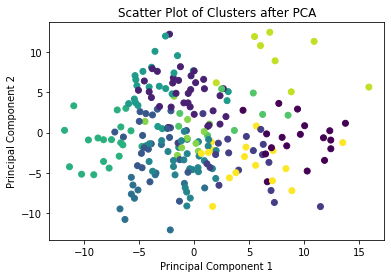

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Create the scatter plot with colors representing clusters
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of Clusters after PCA")

# Show the plot
plt.show()

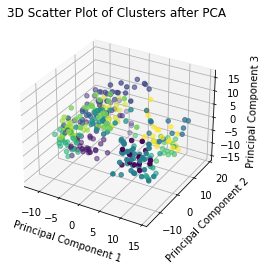

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

# Create a 3D plot with colors representing clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], c=clusters)

# Add labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Scatter Plot of Clusters after PCA")

# Show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


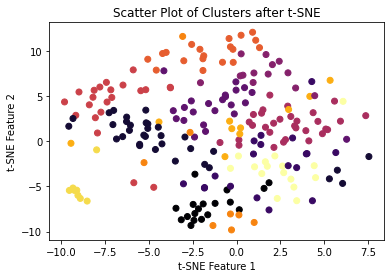

In [106]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def plot_tsne(vectors,clusters):
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2)
    reduced_vectors = tsne.fit_transform(vectors)

    # Create the scatter plot with colors representing clusters
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap = 'inferno')

    # Add labels and title
    plt.xlabel("t-SNE Feature 1")
    plt.ylabel("t-SNE Feature 2")
    plt.title("Scatter Plot of Clusters after t-SNE")

    # Show the plot
    plt.show()
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


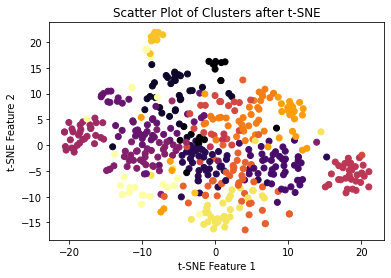

In [108]:
plot_tsne(restaurant_vectors, restaurant_clusters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


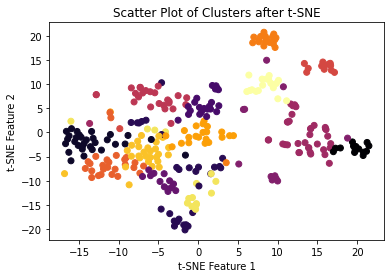

In [109]:
plot_tsne(attraction_vectors, attraction_clusters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


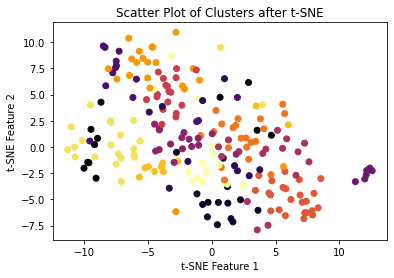

In [142]:
plot_tsne(hotel_vectors, hotel_clusters)

Semantic Similarity: t-SNE is better at preserving semantic relationships between words or documents, allowing for more meaningful interpretations of the visualized clusters. This is because t-SNE is sensitive to local relationships, which is crucial for capturing the nuances of human language.

Non-linear Structure: Human language is inherently non-linear, often with complex relationships between words and concepts. t-SNE can effectively capture these non-linear relationships, while PCA may struggle to represent them accurately.

Outlier Handling: Text data can be prone to outliers due to typos, misspellings, or irrelevant information. t-SNE is less sensitive to outliers than PCA, allowing for a more stable and interpretable visualization of clusters.